<a href="https://colab.research.google.com/github/how-to-train-your-model/data-science-portfolio/blob/main/Digit_Recognizer_M6_PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6: Digit Recognizer(Kaggle)

### Author: Pankaj Pant











# Project Details

Management/Research Question
In layman’s terms, what is the management/research question of interest, and why would anyone care?  


**Requirements**


 - Fit a random forest classifier using the full set of explanatory variables and the model training set (csv).
Record the time it takes to fit the model and then evaluate the model on the csvdata by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.
 - Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the explanatory variables.
 - Record the time it takes to identify the principal components.
 - Using the identified principal components from step (2), use thecsvto build another random forest classifier.
 - Record the time it takes to fit the model and to evaluate the model on the csvdata by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.
 - Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels.  (Follow the example here if needed: kmeans mnist.pdf   Download kmeans mnist.pdf ).kmeans mnist-2.pdf   Download kmeans mnist-2.pdf  
 - Submit the RF Classifier, the PCA RF, and k-means estimations to Kaggle.com, and provide screen snapshots of your scores as well as your Kaggle.com user name.
 - The experiment we have proposed has a major design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen, and submit this to Kaggle.com. 











#Importing Packages

In [2]:
#!pip install pwlf
!#pip install sklearn.utils.testing

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
#import pwlf

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs







from datetime import datetime


%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [4]:
# Allows for muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Allows for viewing the complete data in a single window 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Ingestion
### Connect to google drive and import training and test data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls -l "/content/drive/My Drive/Colab_Notebooks/MSDS-422/W6"

total 125643
-rw------- 1 root root   764051 Feb 16 16:06 'Digit Recognizer_M6_PP.ipynb'
-rw------- 1 root root 51118296 Dec 12  2019  test.csv
-rw------- 1 root root 76775041 Dec 12  2019  train.csv


In [7]:
#Generalize the file path 
w6_files = "/content/drive/My Drive/Colab_Notebooks/MSDS-422/W6"

In [8]:
#Create dataframe
train_df = pd.read_csv(w6_files+"/train.csv")

test_df = pd.read_csv(w6_files+"/test.csv")

print("Shape of train and test dataset :" , train_df.shape ,test_df.shape)

Shape of train and test dataset : (42000, 785) (28000, 784)


In [9]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,...,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixe

Null Values


In [10]:
train_df.isnull().sum().sum()
test_df.isnull().sum().sum()

0

0

Analyze labels

In [11]:
X_train = train_df.drop(['label'], axis=1)
y = train_df['label']

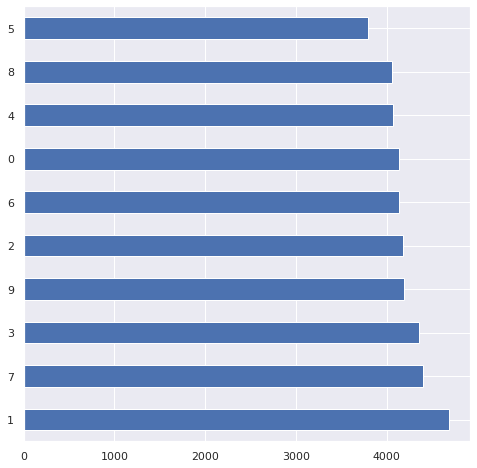

In [12]:
y.value_counts().plot(kind='barh', figsize=(8, 8) )

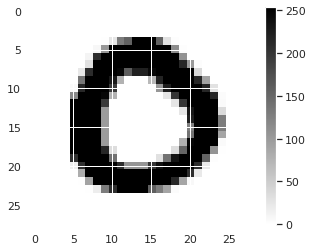

In [13]:
digit_array = train_df.loc[4, "pixel0":]
arr = np.array(digit_array)

image_array = np.reshape(arr, (28,28))
digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)

# **EDA**

In [14]:
#Displays 4 handwritten digit images
def display_digits(N):
  """Picks-up randomly N images within the train dataset between 0 and 41999 and displays the images with 4 images/row"""
  images = np.random.randint(low=0, high=42001, size=N).tolist()
  subset_images = train_df.iloc[images,:]
  subset_images.index = range(1, N+1)
  print("Handwritten picked-up digits: \n", subset_images['label'].values)
  subset_images.drop(columns=['label'], inplace=True)
  print('Randomly picked-up images from the training dataset:\n')
  for i, row in subset_images.iterrows():
    plt.subplot((N//8)+1, 8, i)
    pixels = row.values.reshape((28,28))
    plt.imshow(pixels, cmap='Blues')
    plt.xticks([])
    plt.yticks([])
  plt.show()
  return

Handwritten picked-up digits: 
 [8 2 6 7 9 5 0 3 6 1 8 9 3 4 1]
Randomly picked-up images from the training dataset:



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


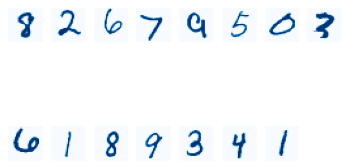

In [15]:
display_digits(15)

Train Test Split

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size=0.3, random_state=101)

#Random Forest Classifier 

In [17]:
start_time = datetime.now()
rfc = RandomForestClassifier(n_estimators=100 ,criterion= 'gini',
                             max_depth=5 , max_features = 'log2',
                             min_samples_split = 8 , min_samples_leaf = 12)
#Train the model using the training sets
rfc.fit(X_train, y_train)
y_pred = cross_val_predict(rfc, X_train, y_train, cv = 3)
print('The efficiency metrics of the Random Forest Classification for Train data is :')
print(metrics.classification_report(y_train, y_pred, digits=4))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
# support column lists the number of samples for each class

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=12,
                       min_samples_split=8)

The efficiency metrics of the Random Forest Classification for Train data is :
              precision    recall  f1-score   support

           0     0.8925    0.9558    0.9231      2919
           1     0.7916    0.9865    0.8784      3262
           2     0.9021    0.8397    0.8698      2919
           3     0.7607    0.8425    0.7995      3067
           4     0.8742    0.8540    0.8640      2863
           5     0.9639    0.5995    0.7392      2674
           6     0.8833    0.9257    0.9040      2895
           7     0.8508    0.9034    0.8763      3086
           8     0.8733    0.7585    0.8119      2836
           9     0.8032    0.7982    0.8007      2879

    accuracy                         0.8506     29400
   macro avg     0.8596    0.8464    0.8467     29400
weighted avg     0.8573    0.8506    0.8480     29400

Duration: 0:00:07.978303


In [18]:
# Validate the model
start_time = datetime.now()
y_hat_pred=rfc.predict(X_valid)
print('The efficiency metrics of the Random Forest Classification for Validation data is :')
print(metrics.classification_report(y_valid, y_hat_pred, digits=4))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

The efficiency metrics of the Random Forest Classification for Validation data is :
              precision    recall  f1-score   support

           0     0.8893    0.9670    0.9265      1213
           1     0.8052    0.9824    0.8850      1422
           2     0.9052    0.8196    0.8602      1258
           3     0.7682    0.8544    0.8090      1284
           4     0.8640    0.8825    0.8732      1209
           5     0.9665    0.5914    0.7338      1121
           6     0.8831    0.9428    0.9120      1242
           7     0.8384    0.8996    0.8679      1315
           8     0.8830    0.7873    0.8324      1227
           9     0.8199    0.7685    0.7934      1309

    accuracy                         0.8535     12600
   macro avg     0.8623    0.8496    0.8493     12600
weighted avg     0.8597    0.8535    0.8504     12600

Duration: 0:00:00.244639


Text(0.5, 2, 'Confusion Matrix for Random Forest Classification for Validation dataset')

Text(84.5, 0.5, 'Predicted Digits')

Text(0.5, 84.5, 'Actual Digits')

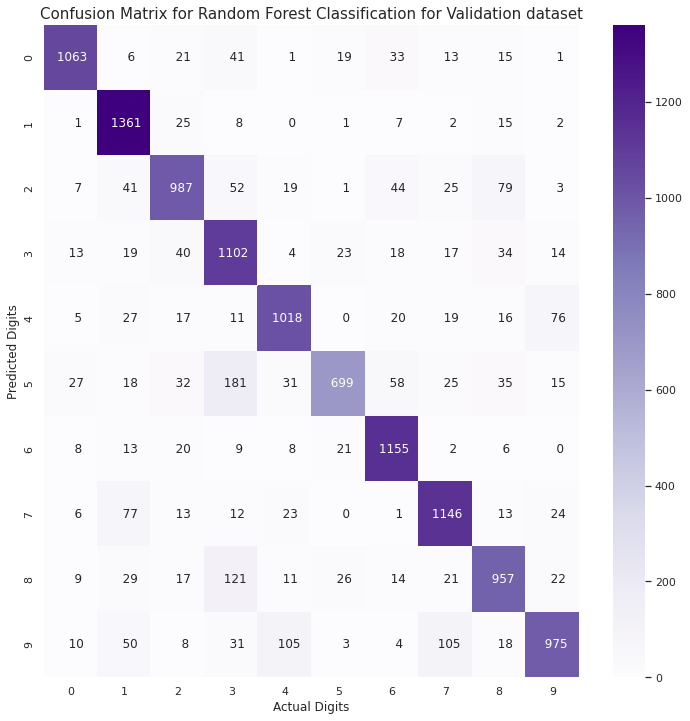

In [113]:
fig = plt.figure(figsize=(12,12))

sns.heatmap(metrics.confusion_matrix(y_valid, y_hat_pred),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Random Forest Classification for Validation dataset', y=2, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

## Random Forest testing

In [19]:
test_df = pd.read_csv(w6_files+"/test.csv")

In [20]:
#Random forest output for the Test dataset :

y_hat_rf = rfc.predict(test_df)
test_df['rf_label'] = (y_hat_rf)



In [21]:


# Creating a dataframe for results
kag_sub = pd.DataFrame({'ImageId': test_df.index, 'Label': test_df['rf_label']})
kag_sub["ImageId"] += 1
kag_sub.head()

kag_sub.to_csv('submission_rfc.csv', index=False)
print("Results are saved to submission.csv")

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,6
4,5,3


Results are saved to submission.csv


## Kagggle Score: 0.85467

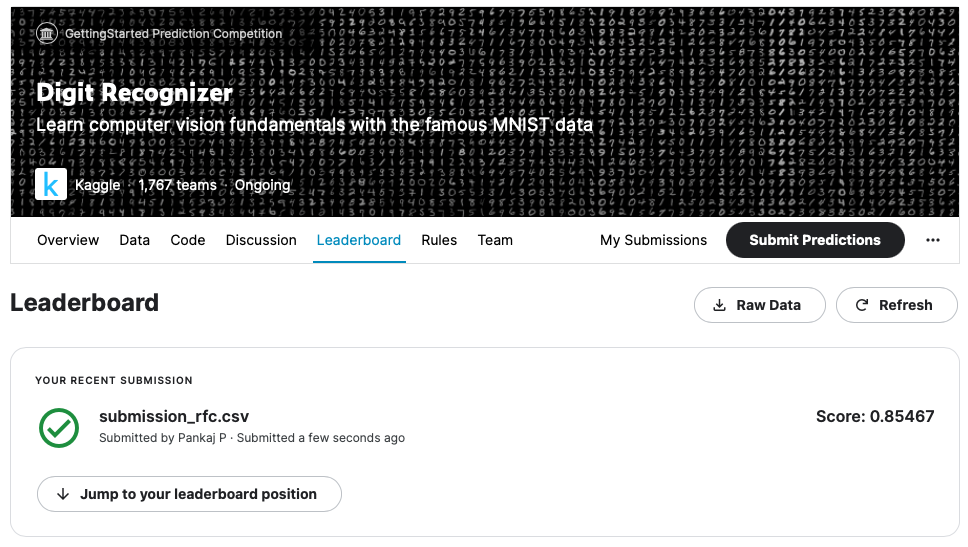

#PCA

Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the explanatory variables.

In [22]:
X_train = train_df.drop(['label'], axis=1)
y = train_df['label']
test_df = pd.read_csv(w6_files+"/test.csv")
X_train.shape
test_df.shape

(42000, 784)

(28000, 784)

In [23]:
X_train_test = pd.concat((X_train, test_df)).reset_index(drop=True)
X_train_test.shape
X_train_test.info()

(70000, 784)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 418.7 MB


In [24]:
# Scaling
X_train_test_sc = MinMaxScaler().fit_transform(X_train_test)

In [25]:
start_time = datetime.now()
pca = PCA(0.95)
pc_fit = pca.fit_transform(X_train_test_sc)
end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))


Duration: 0:00:14.977992


In [26]:
#Checking if 95% is explained
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(max(var1))

95.08999999999988


<BarContainer object of 154 artists>

Text(0, 0.5, 'Explained variance')

Text(0.5, 0, 'Components')

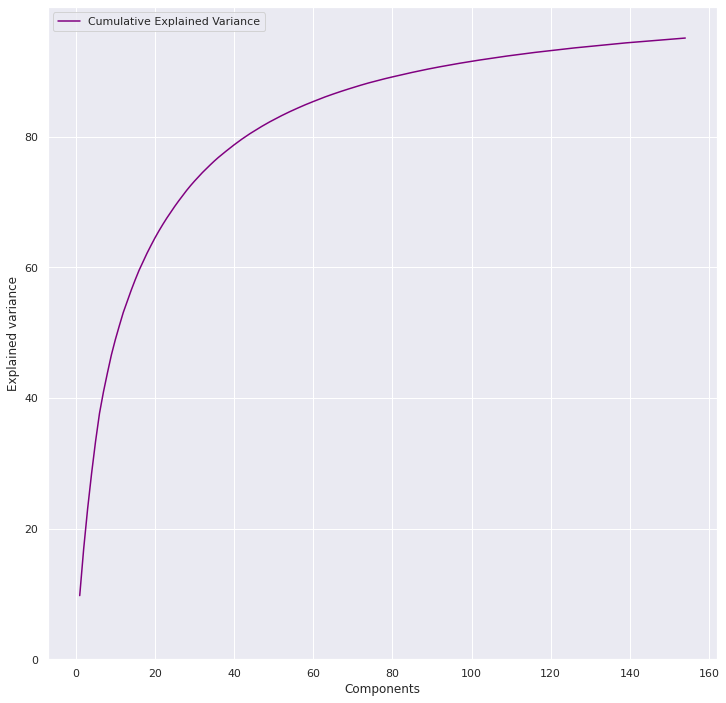

In [27]:
fig = plt.figure(figsize=(12,12))
plt.bar(range(1,len(var)+1),var)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(var)+1),
         var1,
         c='purple',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.show()

In [28]:
pc = pca.fit_transform(X_train_test_sc)
pca_df = pd.DataFrame(data = pc)
pca_df.add_prefix('pca_')
pca_df.shape
X_train_test.shape


,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_40,pca_41,pca_42,pca_43,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49,pca_50,pca_51,pca_52,pca_53,pca_54,pca_55,pca_56,pca_57,pca_58,pca_59,pca_60,pca_61,pca_62,pca_63,pca_64,pca_65,pca_66,pca_67,pca_68,pca_69,pca_70,pca_71,pca_72,pca_73,pca_74,pca_75,pca_76,pca_77,pca_78,pca_79,pca_80,pca_81,pca_82,pca_83,pca_84,pca_85,pca_86,pca_87,pca_88,pca_89,pca_90,pca_91,pca_92,pca_93,pca_94,pca_95,pca_96,pca_97,pca_98,pca_99,pca_100,pca_101,pca_102,pca_103,pca_104,pca_105,pca_106,pca_107,pca_108,pca_109,pca_110,pca_111,pca_112,pca_113,pca_114,pca_115,pca_116,pca_117,pca_118,pca_119,pca_120,pca_121,pca_122,pca_123,pca_124,pca_125,pca_126,pca_127,pca_128,pca_129,pca_130,pca_131,pca_132,pca_133,pca_134,pca_135,pca_136,pca_137,pca_138,pca_139,pca_140,pca_141,pca_142,pca_143,pca_144,pca_145,pca_146,pca_147,pca_148,pca_149,pca_150,pca_151,pca_152,pca_153
0,-2.649512,-2.678101,0.731367,0.499176,-0.307317,1.914216,-2.713889,0.325084,1.283008,0.796547,-1.451107,0.038292,1.516601,-0.500840,0.283967,-0.435342,0.299545,1.072575,0.145146,0.765211,0.185729,0.841241,0.233273,-0.608150,-0.019021,-0.208773,-1.203282,0.956319,-0.383960,0.254912,-0.031055,-0.053468,-0.785412,-0.163299,0.016148,0.610023,-0.148433,-0.308959,-0.554761,0.614820,0.352236,0.165533,0.099258,-0.219355,-0.734853,0.332322,-0.212890,-0.226773,-0.275718,0.126595,0.428248,-0.455543,-0.373613,0.077373,0.204887,0.063500,-0.357612,0.342448,0.040754,-0.044670,-0.083979,0.108910,-0.170692,-0.378710,0.167481,0.414900,-0.111518,0.167586,0.263076,0.010502,-0.388284,0.006734,0.075039,-0.197943,0.436626,0.075864,-0.057230,-0.048277,-0.122412,0.173033,0.078255,-0.300646,-0.275620,-0.104924,-0.098977,-0.050594,-0.087067,0.148493,0.014070,-0.094050,-0.185084,0.323229,-0.171450,0.218616,0.072416,0.006074,0.027881,0.145841,-0.196221,-0.034501,0.209362,0.044730,-0.017402,-0.012120,-0.084134,0.142193,0.039744,-0.070301,0.102895,-0.097115,0.006216,-0.127214,-0.148210,-0.176352,-0.085183,-0.104706,-0.134716,-0.010941,0.091680,0.232868,-0.058528,0.045713,0.030307,-0.043463,-0.065097,-0.112955,0.040286,-0.162065,0.122197,0.117864,0.136650,-0.061401,-0.018066,-0.093976,0.034766,0.054360,-0.117419,0.029061,0.085090,-0.109919,0.000371,-0.043229,-0.034459,0.014147,-0.151254,0.199813,0.066734,-0.020700,0.071398,-0.036675,-0.124300,-0.042747,-0.064033,0.249281
1,6.629902,-1.576738,-1.916020,1.359732,-1.776491,2.890811,2.596223,-0.712451,-0.015692,0.264576,0.133442,0.191101,-0.452254,-1.337285,1.449293,0.033383,1.323357,0.116897,-0.361294,-0.674815,-0.826254,-1.059776,-0.007477,-0.043833,-0.000810,1.046190,-0.315914,0.110108,0.342383,-0.316875,0.192353,0.671697,-0.484722,0.205492,0.017229,0.381110,-0.437862,-0.188547,0.304465,-0.436245,0.037195,0.077521,0.052029,-0.238865,-0.426900,-0.022743,-0.029812,-0.587099,0.514447,-0.060768,0.457010,-0.374203,0.367016,-0.069482,0.390722,-0.271148,-0.398971,0.040274,-0.056707,-0.612767,0.518340,-0.030821,-0.079045,-0.163703,-0.388237,-0.389559,0.179696,-0.397535,0.169885,0.239319,-0.234451,0.077245,0.386025,0.013424,-0.327570,-0.038629,-0.399660,-0.538565,-0.407253,-0.090174,-0.269403,-0.095068,-0.010316,-0.080253,-0.056807,-0.313638,-0.255381,-0.071358,0.191543,-0.134897,-0.200515,-0.343886,-0.268230,0.554967,-0.029703,0.190765,-0.125849,0.077331,0.042870,-0.370413,-0.387948,-0.074432,-0.065978,0.040458,-0.101957,-0.065227,-0.379719,0.177319,0.161977,-0.096410,0.175227,-0.063105,0.040810,0.069311,-0.123336,-0.329020,0.163774,0.158202,0.051299,-0.198707,0.316846,-0.067836,0.128418,0.011712,-0.125457,0.149692,0.188421,-0.319889,0.089288,0.087572,0.059817,-0.138489,0.031187,-0.217866,-0.082749,-0.034819,-0.010476,-0.121177,-0.049674,-0.166396,0.195990,0.000588,-0.154958,0.113113,-0.166519,0.038795,0.055731,-0

(70000, 154)

(70000, 784)

In [29]:
train_df.shape 
pca_df.shape

(42000, 785)

(70000, 154)

In [30]:
r,c = train_df.shape 
pca_train_data = pca_df.iloc[:r, :] 
pca_test_data = pca_df.iloc[r:, :]

pca_train_data.shape
pca_test_data.shape


(42000, 154)

(28000, 154)

In [31]:
train_df.index.max()
print('\n',pca_train_data.index.max())
print('\n',pca_test_data.index.min(), pca_test_data.index.max())


41999


 41999

 42000 69999


# PCA + Random Forest

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(pca_train_data, y, test_size=0.3, random_state=101)

In [33]:
start_time = datetime.now()

rfc_pca = RandomForestClassifier(n_estimators=100 ,criterion= 'gini',max_depth=5 , max_features = 'log2',min_samples_split = 8 , min_samples_leaf = 12)


rfc_pca.fit(X_train, y_train)
y_pred=rfc_pca.predict(X_train)
from sklearn import metrics
print('The efficiency metrics of the Random Forest Classification for training PCA data is :')
print(metrics.classification_report(y_train, y_pred, digits=4))
end_time = datetime.now()

# Time
print('Duration: {}'.format(end_time - start_time))



RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=12,
                       min_samples_split=8)

The efficiency metrics of the Random Forest Classification for training PCA data is :
              precision    recall  f1-score   support

           0     0.9339    0.8959    0.9145      2919
           1     0.8470    0.9608    0.9003      3262
           2     0.8606    0.8208    0.8403      2919
           3     0.7277    0.8846    0.7985      3067
           4     0.8659    0.8460    0.8558      2863
           5     0.9055    0.6627    0.7653      2674
           6     0.8777    0.9320    0.9040      2895
           7     0.8314    0.8901    0.8598      3086
           8     0.8118    0.7757    0.7934      2836
           9     0.8551    0.7562    0.8026      2879

    accuracy                         0.8461     29400
   macro avg     0.8517    0.8425    0.8434     29400
weighted avg     0.8505    0.8461    0.8447     29400

Duration: 0:00:10.753045


In [34]:
start_time = datetime.now()
y_hat_pred=rfc_pca.predict(X_valid)

print('The efficiency metrics of the Random Forest Classification for Validation PCA xdata is :')
print(metrics.classification_report(y_valid, y_hat_pred, digits=4))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

The efficiency metrics of the Random Forest Classification for Validation PCA xdata is :
              precision    recall  f1-score   support

           0     0.9252    0.8763    0.9001      1213
           1     0.8294    0.9571    0.8887      1422
           2     0.8364    0.7846    0.8097      1258
           3     0.7028    0.8583    0.7728      1284
           4     0.8344    0.8420    0.8382      1209
           5     0.8815    0.6236    0.7304      1121
           6     0.8530    0.9300    0.8898      1242
           7     0.8335    0.8715    0.8520      1315
           8     0.8056    0.7800    0.7925      1227
           9     0.8613    0.7448    0.7989      1309

    accuracy                         0.8304     12600
   macro avg     0.8363    0.8268    0.8273     12600
weighted avg     0.8353    0.8304    0.8288     12600

Duration: 0:00:00.201448


In [35]:
#Random forest output for the Test dataset :

y_hat_rf = rfc_pca.predict(pca_test_data)
test_df['rf_pca_label'] = (y_hat_rf)


In [36]:


# Creating a dataframe for results
pca_test_data.index = np.arange(1, len(pca_test_data)+1)
kag_sub = pd.DataFrame({'ImageId': pca_test_data.index, 'Label': test_df['rf_pca_label']})

#kag_sub["ImageId"] += 1
kag_sub.head()
kag_sub.shape

kag_sub.to_csv('submission_rfc_pca.csv', index=False)
print("Results are saved to submission.csv")

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,2


(28000, 2)

Results are saved to submission.csv


## Kaggle Score: 0.83053

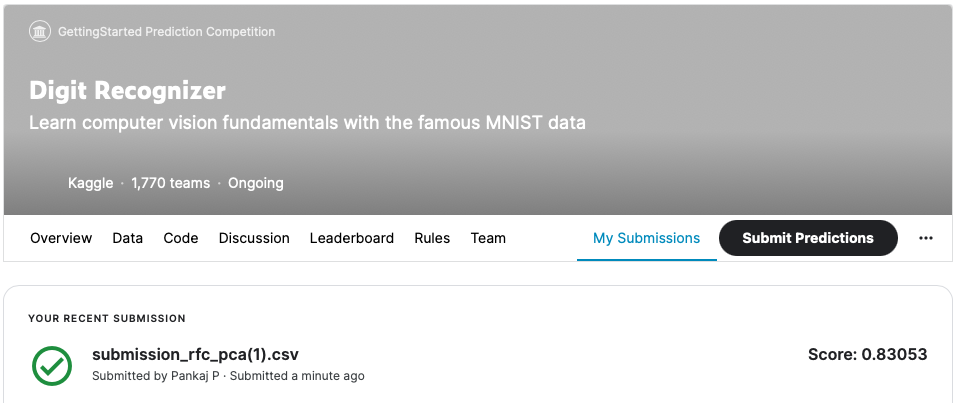

#K-mean clustering

Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels. 



In [37]:
K_train = train_df.drop(['label'], axis=1)
K_y = train_df['label']
test_df = pd.read_csv(w6_files+"/test.csv")
K_train.shape
test_df.shape
K_y.shape

(42000, 784)

(28000, 784)

(42000,)

In [38]:
#K_train_SS = StandardScaler().fit_transform(K_train)
X_train, X_valid, y_train, y_valid = train_test_split(K_train, K_y, test_size=0.3, random_state=101)


In [39]:
# preprocessing the images

# convert each image to 1 dimensional array
X = X_train.values.reshape(len(X_train),-1)

Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(29400, 784)
(784,)


In [40]:

n_digits = len(np.unique(y_valid))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

10


MiniBatchKMeans(n_clusters=10)

In [41]:
kmeans.labels_

array([1, 8, 6, ..., 6, 3, 5], dtype=int32)

In [42]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
        #print('index testing',index)
        #print('actual label',actual_labels.index)

        # append actual labels for each point in cluster
        #labels.append(actual_labels.index)
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [43]:
#Y.head()
print(kmeans.n_clusters)

print(kmeans)

print(kmeans.labels_)

print(Y)

10
MiniBatchKMeans(n_clusters=10)
[1 8 6 ... 6 3 5]
15388    8
38298    6
13109    5
4521     3
39509    0
        ..
12363    7
5695     5
8006     2
17745    9
17931    7
Name: label, Length: 29400, dtype: int64


In [44]:
# # test the infer_cluster_labels() and infer_data_labels() functions
# cluster_labels = infer_cluster_labels(kmeans, Y)
# X_clusters = kmeans.predict(X)
# predicted_labels = infer_data_labels(X_clusters, cluster_labels)
# print(predicted_labels[:20])
# print(Y[:20])

In [45]:
kmeans = KMeans(n_clusters=10)
#kmeans.fit(X_train_K)
kmeans.fit(X_train, y_train)

y_kmeans = kmeans.predict(X_train)
y_kmeans.shape

KMeans(n_clusters=10)

(29400,)

In [46]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X_train)
kmeans.cluster_centers_.shape

(10, 784)

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

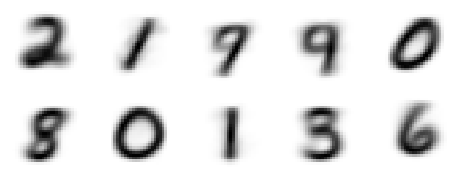

In [47]:
# Plot K-means cluster 
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [125]:
def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [49]:
def retrieve_info(cluster_labels,y_train):
    '''Associates most probable label with each cluster in KMeans model returns: dictionary of clusters assigned to each label'''
 # Initializing
    reference_labels = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [118]:
start_time = datetime.now()
kmeans = MiniBatchKMeans(n_clusters = 24).fit(K_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
kmeans.labels_
len(kmeans.labels_)


Duration: 0:00:02.409696


array([ 2,  4,  1, ..., 11, 16, 17], dtype=int32)

42000

In [119]:
test_df = pd.read_csv(w6_files+"/test.csv")
test_df.shape


(28000, 784)

In [120]:
#K-means output for the Test dataset :
#kmeans.predict(test_df)
y_hat_k = kmeans.predict(test_df)
len(y_hat_k)
y_hat_k
test_df['Label_k'] = (y_hat_k)


28000

array([21,  4,  3, ..., 18,  8,  9], dtype=int32)

In [121]:
test_df.head()
test_df['Label_k'].unique()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,...,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,p

array([21,  4,  3, 18, 22, 13,  5,  6, 15,  1,  8,  7,  2, 10, 11, 17, 23,
       16, 20, 14,  0, 12, 19,  9], dtype=int32)

In [106]:
test_df.head()
test_df['Label_k'].unique()
# Creating a dataframe for results
kag_sub = pd.DataFrame({'ImageId': np.arange(1, len(test_df)+1), 'Label': test_df['Label_k']})

#kag_sub["ImageId"] += 1
kag_sub.tail()
kag_sub.shape

kag_sub.to_csv('submission_k.csv', index=False)
print("Results are saved to submission.csv")

,ImageId,Label
27995,27996,222
27996,27997,148
27997,27998,11
27998,27999,254
27999,28000,92


(28000, 2)

Results are saved to submission.csv


# K-Means - Part 2

In [151]:
K_train = train_df.drop(['label'], axis=1)
K_y = train_df['label']
K_train.shape
K_y.shape

(42000, 784)

(42000,)

In [152]:
labels_flat = K_y.values.ravel()
labels_flat.shape
labels_count = np.unique(labels_flat).shape[0]
labels_count

(42000,)

10

In [153]:
start_time = datetime.now()
clusters = [8, 16, 32, 64, 128, 256]
clusters = [256, 512]


# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(K_train)
    
    # print cluster metrics
    calculate_metrics(estimator, K_train, labels_flat)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, labels_flat)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(labels_flat, predicted_Y)))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

MiniBatchKMeans(n_clusters=256)

Number of Clusters: 256
Inertia: 68402343543.08367
Homogeneity: 0.8404802918118673
Accuracy: 0.8918571428571429



MiniBatchKMeans(n_clusters=512)

Number of Clusters: 512
Inertia: 62435650194.85521
Homogeneity: 0.8810114192164885
Accuracy: 0.9186190476190477

Duration: 0:01:09.915142


In [154]:
start_time = datetime.now()
X_test = np.multiply(X_valid, 1.0 / 255.0)
y_test = estimator.fit(X_test)
estimator = MiniBatchKMeans(n_clusters = 512)
estimator.fit(X_test)

# determine predicted labels
cluster_labels = infer_cluster_labels(estimator, labels_flat)
predicted_Y_test = infer_data_labels(estimator.labels_, cluster_labels)  
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

MiniBatchKMeans(n_clusters=512)

Duration: 0:00:35.098110


In [155]:
predicted_Y_test= pd.DataFrame(predicted_Y_test)


In [156]:
test_df = pd.read_csv(w6_files+"/test.csv")
test_df.shape

(28000, 784)

In [157]:
start_time = datetime.now()
X_test = np.multiply(test_df, 1.0 / 255.0)
estimator = MiniBatchKMeans(n_clusters = 512)
estimator.fit(X_test)
#.iloc[r:, :]
# determine predicted labels
cluster_labels = infer_cluster_labels(estimator, labels_flat)
predicted_Y_test = infer_data_labels(estimator.labels_, cluster_labels)  
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

MiniBatchKMeans(n_clusters=512)

Duration: 0:00:34.050289


In [158]:
test_df['Label_k1'] = (predicted_Y_test)


In [159]:
test_df.head()
test_df['Label_k1'].unique()
# Creating a dataframe for results
kag_sub = pd.DataFrame({'ImageId': np.arange(1, len(test_df)+1), 'Label': test_df['Label_k1']})

#kag_sub["ImageId"] += 1
kag_sub.tail()
kag_sub.shape

kag_sub.to_csv('submission_k_v2.csv', index=False)
print("Results are saved to submission.csv")

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,...,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,p

array([6, 1, 7, 3, 0, 9, 5, 4, 8, 2], dtype=uint8)

,ImageId,Label
27995,27996,6
27996,27997,1
27997,27998,1
27998,27999,3
27999,28000,6


(28000, 2)

Results are saved to submission.csv


## Kaggle Score

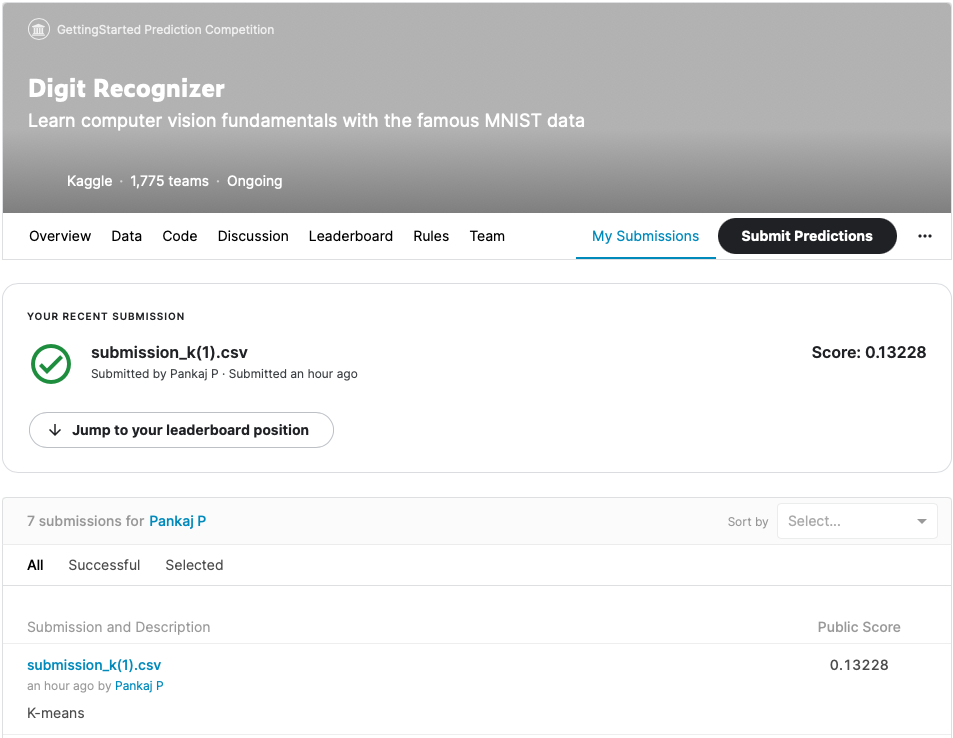

#Conclusion






#References:

 - https://scikit-learn.org/stable/modules/svm.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
 


